Problem 1

In [89]:
'''
Solve the Logistic Regression algorithm using the given dataset
weatherAUS.csv
1) The target variable RainTomorrow means: Did it rain the
next day? Yes or No.
2) Split the data into Training and Testing parts: 80% for
training and 20% for testing.
3) Note down following points:
i) accuracy and confusion matrix
ii) predict RainTomorrow by giving inputs:
first input :
[4,17.9,35.2,0,12,12.3,11,48,1,12,6,20,20,13,1006.3,1004.
4,2,5,26.6,33.4,0]
second input:
[15.0,46.0,23.0,1008.6,1008.3,2.0,6.0,28.1,33.2,1,5963,4,1
9.7,37.3,0.0,14.2,13.4,11,28.0,9,1]
iii) Try new prediction by giving unknown inputs to the
model and get predicted output
'''

'\nSolve the Logistic Regression algorithm using the given dataset\nweatherAUS.csv\n1) The target variable RainTomorrow means: Did it rain the\nnext day? Yes or No.\n2) Split the data into Training and Testing parts: 80% for\ntraining and 20% for testing.\n3) Note down following points:\ni) accuracy and confusion matrix\nii) predict RainTomorrow by giving inputs:\nfirst input :\n[4,17.9,35.2,0,12,12.3,11,48,1,12,6,20,20,13,1006.3,1004.\n4,2,5,26.6,33.4,0]\nsecond input:\n[15.0,46.0,23.0,1008.6,1008.3,2.0,6.0,28.1,33.2,1,5963,4,1\n9.7,37.3,0.0,14.2,13.4,11,28.0,9,1]\niii) Try new prediction by giving unknown inputs to the\nmodel and get predicted output\n'

In [90]:
import pandas as pd

df = pd.read_csv("Logistic Regression-weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df.isnull().sum()

Date              1466
Location          1466
MinTemp           2100
MaxTemp           1788
Rainfall          2854
Evaporation      60843
Sunshine         67816
WindGustDir      10770
WindGustSpeed    10710
WindDir9am       11425
WindDir3pm        5217
WindSpeed9am      2789
WindSpeed3pm      4072
Humidity9am       3238
Humidity3pm       5075
Pressure9am      15478
Pressure3pm      15446
Cloud9am         53995
Cloud3pm         57502
Temp9am           2368
Temp3pm           4191
RainToday         2854
RISK_MM           1466
RainTomorrow      1466
dtype: int64

In [92]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,140093.000000,140405.000000,139339.000000,81350.000000,74377.000000,131483.000000,139404.000000,138121.000000,138955.000000,137118.000000,126715.000000,126747.000000,88198.000000,84691.000000,139825.000000,138002.000000,140727.000000
mean,12.164958,23.153292,2.367070,5.469824,7.624853,39.968878,13.965417,18.653970,69.120845,51.777126,1017.659044,1015.279711,4.432776,4.501612,16.947062,21.610214,2.377139
std,6.387259,7.074520,8.496989,4.188537,3.781525,13.614193,8.895559,8.819356,18.823555,20.642849,7.112139,7.039617,2.887093,2.720221,6.465029,6.891343,8.507090
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.100000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.300000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


<Axes: xlabel='RainTomorrow', ylabel='count'>

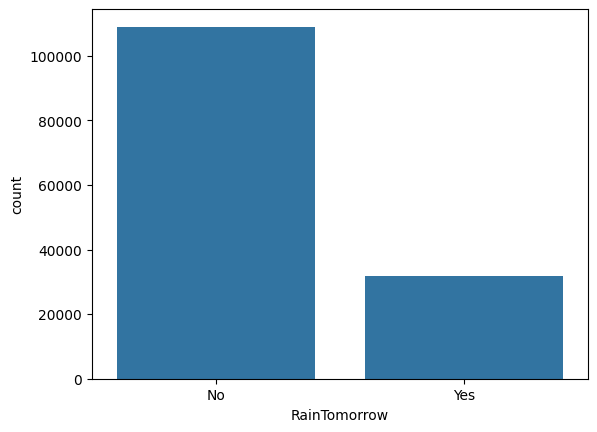

In [93]:
import seaborn as sns
sns.countplot(x= 'RainTomorrow',data=df) # Bar plot

<Axes: xlabel='RainTomorrow', ylabel='MaxTemp'>

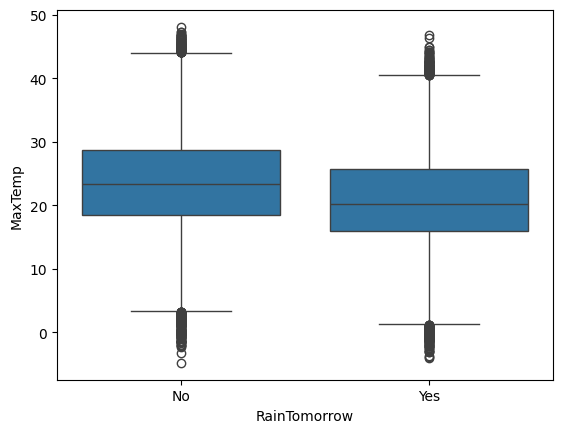

In [94]:
sns.boxplot(x = 'RainTomorrow',y = 'MaxTemp',data = df)

In [95]:
# Dropping the NaN values from the data as they can be problematic
# the dropna function of pandas removes the entire row in the Nan is present in any of the column
df.dropna(inplace=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,01/01/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,02/01/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,04/01/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,05/01/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,06/01/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,20/06/2017,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0.0,No
139109,21/06/2017,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0.0,No
139110,22/06/2017,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0.0,No
139111,23/06/2017,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0.0,No


In [96]:
from sklearn.preprocessing import LabelEncoder
categorical_var = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
le = LabelEncoder()
for i in categorical_var:
 df[i] = le.fit_transform(df[i])
df.head()
#df.to_csv('new_rain.csv')


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,01/01/2009,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0
5940,02/01/2009,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0.0,0
5942,04/01/2009,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0.0,0
5943,05/01/2009,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0.0,0
5944,06/01/2009,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0.0,0


Split the data into tarin and test

In [97]:
from sklearn.model_selection import train_test_split

X = df.drop(['Date','RISK_MM','RainTomorrow'],axis = 1)
y = df['RainTomorrow']
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size = 0.2)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
my_model.fit(X_train,y_train)


LogisticRegression()

Test the Model

In [100]:
predictions = my_model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8520914569301666

In [102]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
confusion_mat = confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,33214,1987
Actual pos,4689,5246


<Axes: >

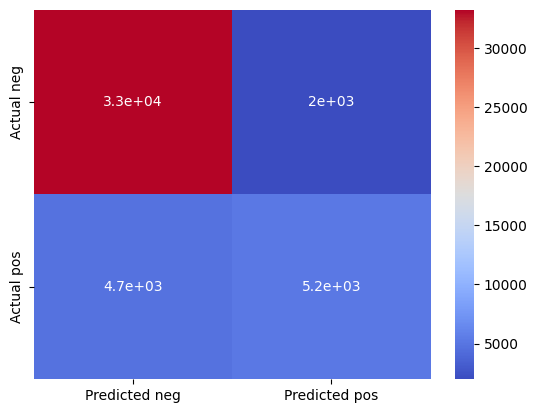

In [104]:
sns.heatmap(confusion_df,cmap = 'coolwarm',annot = True)

Deploy

In [105]:
pred_new=my_model.predict([[4,17.9,35.2,0,12,12.3,11,48,1,12,6,20,20,13,1006.3,1004.4,2,5,26.6,33.4,0]])
pred_new

array([0])

In [106]:
pred_new=my_model.predict([[15.0,46.0,23.0,1008.6,1008.3,2.0,6.0,28.1,33.2,1,5963,4,19.7,37.3,0.0,14.2,13.4,11,28.0,9,1]])
pred_new

array([1])

Problem 2

In [107]:
'''
1) Solve the Logistic Regression algorithm of M.L using the
given dataset Admission_Predict .csv
2) The target variable is “ChanceOfAdmit";
3) Split the data into training and testing parts : 80% for
training and 20% for testing.
4) Note down the output of your program for the following :
i) Accuracy
ii) Confusion Matrix
iii) Prediction ChanceOfAdmit for feature matrix :
[1,337,118,4,4.5,9.65,1]
5) Write these values within comments at the end of your
source code.
'''

'\n1) Solve the Logistic Regression algorithm of M.L using the\ngiven dataset Admission_Predict .csv\n2) The target variable is “ChanceOfAdmit";\n3) Split the data into training and testing parts : 80% for\ntraining and 20% for testing.\n4) Note down the output of your program for the following :\ni) Accuracy\nii) Confusion Matrix\niii) Prediction ChanceOfAdmit for feature matrix :\n[1,337,118,4,4.5,9.65,1]\n5) Write these values within comments at the end of your\nsource code.\n'

In [108]:
import pandas as pd
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,Chance of Admit,LOR,CGPA,Research
0,1,337,118,4,0.92,4.5,9.65,1
1,2,324,107,4,0.76,4.5,8.87,1
2,3,316,104,3,0.72,3.5,8.00,1
3,4,322,110,3,0.80,2.5,8.67,1
4,5,314,103,2,0.65,3.0,8.21,0


In [109]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
Chance of Admit      0
LOR                  0
CGPA                 0
Research             0
dtype: int64

In [110]:
# Rename the columns name which have to required change.
df=df.rename(columns={'Serial No.':'SerialNo', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL','University Rating':'UniversityRating','LOR':'LOR','Chance of Admit ':'ChanceOfAdmit'})
df.columns

Index(['SerialNo', 'GRE', 'TOEFL', 'UniversityRating', 'ChanceOfAdmit', 'LOR ',
       'CGPA', 'Research'],
      dtype='object')

In [111]:
df['ChanceOfAdmit'].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39])

In [112]:
bins = (0.05,0.50,0.99)
group_names = ['No','Yes']
categories = pd.cut(df['ChanceOfAdmit'], bins, labels = group_names)
df['ChanceOfAdmit'] = categories

In [113]:
df['ChanceOfAdmit'].value_counts()

ChanceOfAdmit
Yes    365
No      35
Name: count, dtype: int64

In [114]:
#X = df.drop([df.columns[8]] , axis='columns')
#X = df.drop(columns="(Admit)", axis="columns")
X = df.drop(["ChanceOfAdmit","SerialNo"], axis=1)
y = df['ChanceOfAdmit']

In [115]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Train and Test Data

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=156)

In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [118]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
result = my_model.fit(X_train, y_train)

In [119]:
predictions = result.predict(X_test)
predictions


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [120]:
# Use score method to get accuracy of model
score = result.score(X_test, y_test)
print(score)

0.9375


In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9375

In [122]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,4,3
Actual pos,2,71


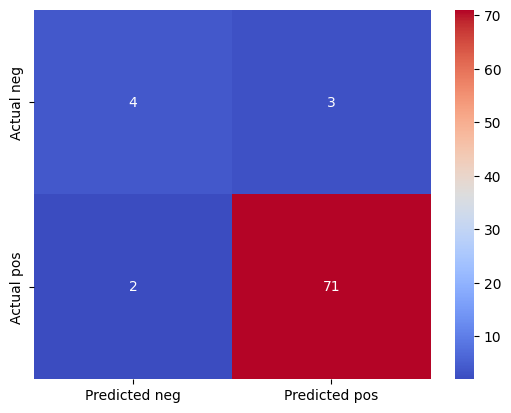

In [124]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot= True)


Deploy

In [129]:
pred_new=my_model.predict([[337,118,4,4.5,9.65,1]])
pred_new

array([1])

<Axes: >

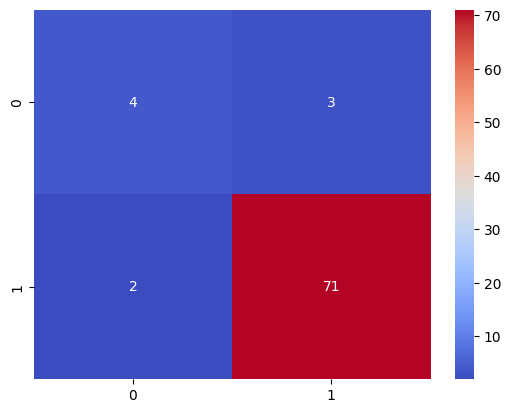

In [131]:
sns.heatmap(confusion_mat, cmap='coolwarm',annot= True)